### Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns 

In [2]:
df=pd.read_excel("D:DataSets/Airline.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Data Preprocessing

#### Checking the Null Values and Removing them

In [3]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
#Since, only two null values we can drop them

df.dropna(inplace=True)

In [5]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### Conversion into Date-Time Format

In [6]:
# Here function is used to convert the dtype of following three columns to date-time

from Function_File import *

for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    date_time(i)

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-13 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-13 05:50:00,2021-06-13 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-13 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-13 18:05:00,2021-06-13 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-13 16:50:00,2021-06-13 21:35:00,4h 45m,1 stop,No info,13302


#### Converting Date of Journey to Day and Month Resp. 

In [8]:
df['journay_day']=df['Date_of_Journey'].dt.day
df['journay_month']=df['Date_of_Journey'].dt.month
df.drop('Date_of_Journey', axis=1,inplace=True)

In [9]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journay_day,journay_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-06-13 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-13 05:50:00,2021-06-13 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-13 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-06-13 18:05:00,2021-06-13 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-06-13 16:50:00,2021-06-13 21:35:00,4h 45m,1 stop,No info,13302,3,1


#### Extracting Minute and Hour from Departure Time and Arrival Time

In [10]:
extract_hr_min('Dep_Time')
extract_hr_min('Arrival_Time')
df=df.drop(['Dep_Time','Arrival_Time'],axis=1)

#### Changing Duration into Appropriate Format

In [11]:
# Adding 0m in the duration field according to the requirement

dur=list(df['Duration'])
for i in range(0,len(dur)):
    if len(dur[i].split(" "))==2:
        pass
    else:
        if 'h' in dur[i]:
            dur[i]=dur[i]+' 0m'
        else:
            dur[i]=dur[i]+' 0h'

df['Duration']=dur

In [12]:
#Adding Duration hour and minute columns

df['Duration_hr']=0
df['Duration_min']=0

for i in df.index:
    df['Duration_hr'][i]=df['Duration'][i].split()[0][0:-1]
    df['Duration_min'][i]=df['Duration'][i].split()[1][0:-1]
    
df=df.drop('Duration',axis=1)

In [13]:
df['Duration_hr']=df['Duration_hr'].astype(int)
df['Duration_min']=df['Duration_min'].astype(int)

#### Diviing into Categorical and Numerical Coulmns 

In [14]:
cat=[]
for i in df.columns:
    if df[i].dtype==object:
        cat.append(i)

In [15]:
num=[]
for i in df.columns:
    if df[i].dtype!=object:
        num.append(i)

In [16]:
cate_df=df[cat]
cate_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


### Feature Engineering

#### One Hot Encoding on Airlines Column

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


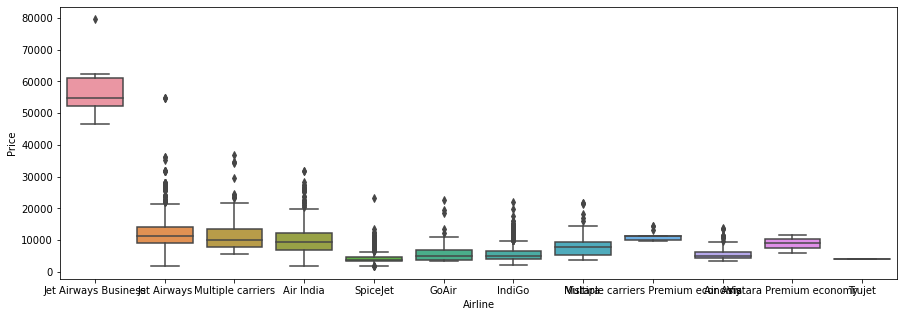

In [17]:
one_hot_encoding(cate_df,'Airline')
Airline_df=pd.get_dummies(data['Airline'],drop_first=True)
Airline_df.head()

#### One Hot Encoding on Source Column

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


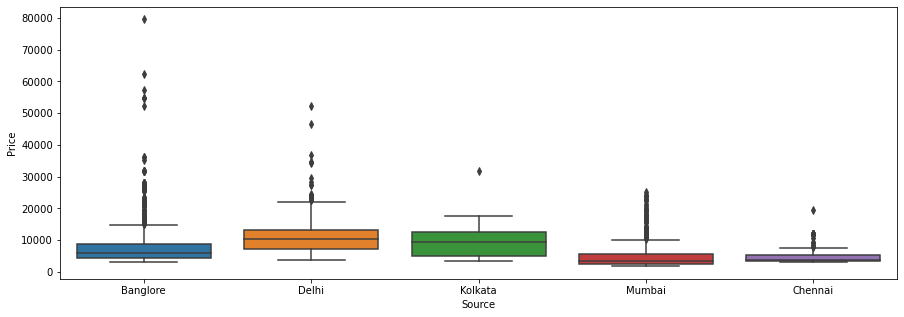

In [18]:
one_hot_encoding(cate_df,'Source')
Source_df=pd.get_dummies(df['Source'],drop_first=True)
Source_df.head()

#### One Hot Encoding on Destination Column

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


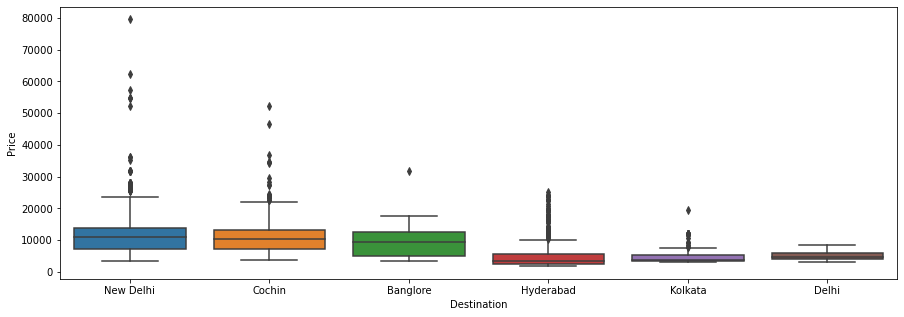

In [19]:
one_hot_encoding(cate_df,'Destination')
Destination_df=pd.get_dummies(df['Destination'],drop_first=True)
Destination_df.head()

#### Label Encoding on Route Column

In [20]:
cate_df['Route_1']=cate_df['Route'].str.split("→").str[0]
cate_df['Route_2']=cate_df['Route'].str.split("→").str[1]
cate_df['Route_3']=cate_df['Route'].str.split("→").str[2]
cate_df['Route_4']=cate_df['Route'].str.split("→").str[3]
cate_df['Route_5']=cate_df['Route'].str.split("→").str[4]

In [21]:
cate_df=cate_df.drop('Route', axis=1)

In [22]:
#Finding the Null Values and Clearing them

cate_df.isna().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            1
Additional_Info        0
Route_1                1
Route_2                1
Route_3             3492
Route_4             9117
Route_5            10637
dtype: int64

In [23]:
cate_df=cate_df.fillna("Na")

In [24]:
cate_df.isna().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [25]:
cate_df[list(cate_df.columns)].nunique()

Airline            12
Source              5
Destination         6
Total_Stops         6
Additional_Info    10
Route_1             6
Route_2            46
Route_3            30
Route_4            14
Route_5             6
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['Route_1', 'Route_2', 'Route_3','Route_4','Route_5']:
    cate_df[i]=le.fit_transform(cate_df[i])
cate_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


#### For Number of Stops and Additional Info Column

In [27]:
dict={'non-stop':'0','1 stop':'1','2 stops':'2','3 stops':'3','4 stops':'4'}
cate_df['Total_Stops']=cate_df['Total_Stops'].map(dict)

In [28]:
cate_df['Total_Stops'].dropna(inplace=True)

#### DataFrame Formation

In [29]:
df=pd.concat([cate_df,Airline_df,Source_df,Destination_df,df[num]], axis=1)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,...,New Delhi,Price,journay_day,journay_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5,...,1,13302,3,1,16,50,21,35,4,45


In [30]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Price', 'journay_day', 'journay_month', 'Dep_Time_hour',
       'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hr',
       'Duration_min'],
      dtype='object')

In [31]:
df=df.drop(['Airline','Source','Destination','Additional_Info'], axis=1) 
#These are the columnson which label encoding is applied

In [32]:
pd.set_option('display.max_columns',35)
df.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journay_day,journay_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hr,Duration_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


#### Outliers Detection in Output 

In [33]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(df)

<Figure size 2160x1440 with 0 Axes>

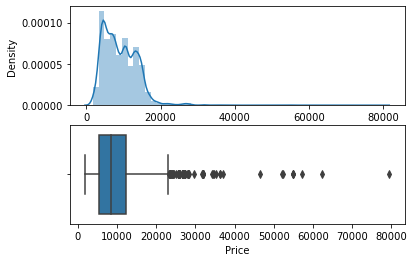

In [34]:
plot(df,'Price')

In [35]:
#Lets say we are taking price ranges less than,40,000
df['Price']=np.where(df['Price']>=40000, df['Price'].median(), df['Price'])

<Figure size 2160x1440 with 0 Axes>

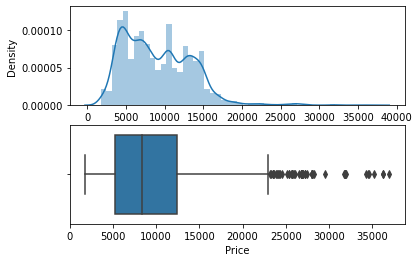

In [36]:
plot(df,'Price')

### Feature Selection

In [37]:
#Dividing the x and y 

x=df.drop('Price',axis=1)
y=df['Price']

In [38]:
x[x['Total_Stops'].isnull()==True]

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journay_day,journay_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hr,Duration_min
9039,NaN,5,45,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,5,6,9,45,9,25,23,40


In [39]:
x['Total_Stops'].dropna(inplace=True)

In [40]:
x.drop(labels=[9039], axis=0, inplace=True)
y.drop(labels=[9039], axis=0, inplace=True)

In [41]:
#Defining the importance of features

from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(x,y)

array([2.15824371e+00, 2.03543386e+00, 2.74591107e+00, 2.31969498e+00,
       1.52316153e+00, 6.89076602e-01, 7.69493328e-01, 1.02152019e-01,
       6.74327757e-01, 9.24281037e-01, 0.00000000e+00, 5.49857554e-01,
       1.59408945e-02, 3.25753039e-01, 0.00000000e+00, 2.20398642e-01,
       2.52625783e-03, 1.64701180e-01, 1.51449897e+00, 8.79509113e-01,
       2.99354694e-01, 1.54805389e+00, 4.01199230e-01, 2.95121081e-01,
       1.69949969e-01, 3.70103994e-01, 1.07377511e+00, 8.68228570e-01,
       1.43552415e+00, 1.24191459e+00, 1.86668862e+00, 1.53381870e+00,
       1.76521250e+00, 1.05839937e+00])

In [42]:
importance=pd.DataFrame(mutual_info_classif(x,y), index=x.columns)
importance.columns=['Importance']
importance.sort_values(by='Importance', ascending=False)

,Importance
Route_2,2.830345e+00
Route_3,2.309361e+00
Total_Stops,2.172296e+00
Route_1,2.047134e+00
Arrival_Time_hour,1.869334e+00
Duration_hr,1.777330e+00
Delhi,1.575750e+00
Arrival_Time_min,1.564874e+00
Cochin,1.549326e+00
Dep_Time_hour,1.439206e+00


In [43]:
x.drop(['IndiGo','Multiple carriers','Delhi','New Delhi','SpiceJet','Mumbai','Hyderabad','Vistara','Kolkata','Chennai','GoAir','Multiple carriers Premium economy','Jet Airways Business','Vistara Premium economy','Trujet'],axis=1, inplace=True)

### Modelling of Data

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Training Score: 0.9476127476258887
Predictions are [ 8435.76833333  5007.7725      3928.34464286 ...  6735.98
 15047.66        4797.7       ]


Score: 0.7985495701997449
MAE : 1206.68861003595
MSE : 3991980.7916958104
RMSE : 34.73742376797609


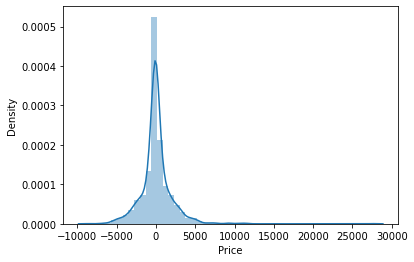

In [45]:
from Function_File import *

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Here 4 models have been tested and their training and testing accuracies is defined
train_score_RF,test_score_RF,MAE_RF,MSE_RF,RMSE_RF=predict(RandomForestRegressor(),x_train,y_train,x_test,y_test)

Training Score: 0.5682847707066253
Predictions are [ 5763.97448104  6587.41067838  2897.80444184 ...  8568.63065808
 14579.23923004  5192.83979871]


Score: 0.553543212024112
MAE : 2069.4822652287025
MSE : 8847074.308499176
RMSE : 45.491562571851745


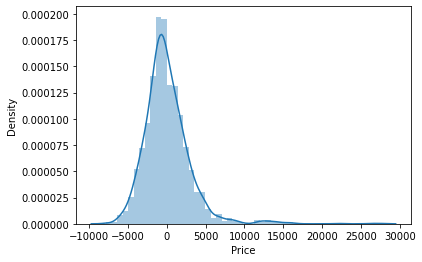

In [47]:
train_score_LR,test_score_LR,MAE_LR,MSE_LR,RMSE_LR=predict(LinearRegression(),x_train,y_train,x_test,y_test)

Training Score: 0.9609574023411548
Predictions are [ 8855.  4544.  3739. ...  6480. 17686.  4804.]


Score: 0.7080681498647223
MAE : 1371.4588441740757
MSE : 5784978.167481542
RMSE : 37.033212717425364


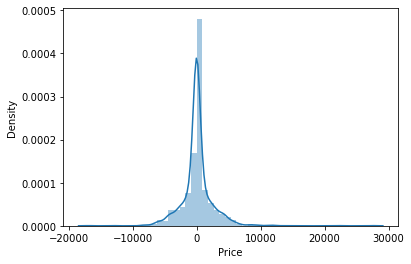

In [48]:
train_score_DT,test_score_DT,MAE_DT,MSE_DT,RMSE_DT=predict(DecisionTreeRegressor(),x_train,y_train,x_test,y_test)

Training Score: 0.7824034425448436
Predictions are [ 6795.6  5938.   3843.6 ...  9162.8 17285.8  4636. ]


Score: 0.6422240219198803
MAE : 1722.5766027140853
MSE : 7089758.178437062
RMSE : 41.503934785922226


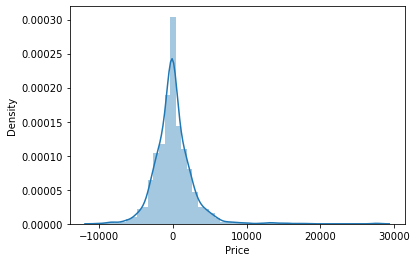

In [49]:
train_score_KNR,test_score_KNR,MAE_KNR,MSE_KNR,RMSE_KNR=predict(KNeighborsRegressor(),x_train,y_train,x_test,y_test)

### Forming their DataFrames for Comparison

In [59]:
frame={"Name of Model":["KNearest Regressor","Linear Regressor","Decision Tree","Random Forests"],
       "Training Score":[train_score_KNR,train_score_LR,train_score_DT,train_score_RF],
      "Score":[test_score_KNR,test_score_LR,test_score_DT,test_score_RF],
      "MAE":[MAE_KNR,MAE_LR,MAE_DT,MAE_RF],
      "MSE":[MSE_KNR,MSE_LR,MSE_DT,MSE_RF],
      "RMSE":[RMSE_KNR,RMSE_LR,RMSE_DT,RMSE_RF]}

In [60]:
pd.DataFrame(frame)

,Name of Model,Training Score,Score,MAE,MSE,RMSE
0,KNearest Regressor,0.782403,0.642224,1722.576603,7.089758e+06,41.503935
1,Linear Regressor,0.568285,0.553543,2069.482265,8.847074e+06,45.491563
2,Decision Tree,0.960957,0.708068,1371.458844,5.784978e+06,37.033213
3,Random Forests,0.947613,0.798550,1206.688610,3.991981e+06,34.737424


#### Here, the data of KNR is not great but decision tree is getting somehow overfit over the data.
#### Best Training Score and Test Score comes out with Random Forests. Thus we will move forward with Random Forests

### Tuning of Hyper-Parameters

For Random Forest Regressor

Fitting 3 folds for each of 10 candidates, totalling 30 fits
The best parameters are  {'n_estimators': 100, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 13}
Score 0.8260583817389076
MAE : 1174.8931165623192
MSE : 3446860.846428867
RMSE : 34.27671391137603


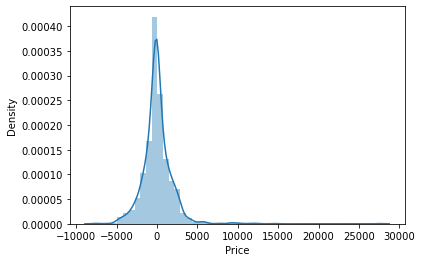

In [50]:
n_estimators=[int(i) for i in np.linspace(start=100,stop=1200,num=6)]
max_depth=[int(i) for i in np.linspace(start=5,stop=30,num=4)]
RF=RandomForestRegressor()

randm_grid={
    'n_estimators': n_estimators,
    'max_features': ['auto','sqrt'],
    'max_depth': max_depth,
    'min_samples_split': [5,10,15,100]
}

randomcv(RF,randm_grid,x_train,y_train,x_test,y_test)

#### Thus, the test score has increased to 82.605% with MAE decreased to 1174.893